In [2]:
matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df1 = pd.read_csv("df_final_web_data_pt_1.txt")
df2 = pd.read_csv("df_final_web_data_pt_2.txt")

In [5]:
df_demo = pd.read_csv("df_final_demo.txt")
df_experiment = pd.read_csv("df_final_experiment_clients.txt")

Concatenamos los dos dataframes sobre web data

In [6]:
df_web = pd.concat ([df1, df2], ignore_index=True, axis=0)

### Comenzamos limpieza del df demográfico

Creamos nuevas columnas para limpiar los meses y años

In [7]:
df_demo.drop(columns=['clnt_tenure_yr'], inplace=True)

In [8]:
df_demo['tenure_years'] = (df_demo['clnt_tenure_mnth'].fillna(0) // 12).astype(int)
df_demo['tenure_months_resto'] = (df_demo['clnt_tenure_mnth'].fillna(0) % 12).astype(int)

In [9]:
#creamos el nuevo orden deseado de las columnas nuevas
cols = df_demo.columns.tolist()

# Eliminamos las columnas que vamos a reubicar
cols.remove('tenure_years')
cols.remove('tenure_months_resto')

# Insertamos las nuevas columnas en la posición deseada
cols.insert(2, 'tenure_years')          
cols.insert(3, 'tenure_months_resto')   

df_demo = df_demo[cols]

In [10]:
#rellenamos nulos
df_demo['clnt_age'] = df_demo['clnt_age'].fillna(0)
df_demo['num_accts'] = df_demo['num_accts'].fillna(0)
df_demo['calls_6_mnth'] = df_demo['calls_6_mnth'].fillna(0)
df_demo['logons_6_mnth'] = df_demo['logons_6_mnth'].fillna(0)
df_demo['bal'] = df_demo['bal'].fillna(0)  

In [11]:
#convertimos a enteros
df_demo['clnt_age'] = df_demo['clnt_age'].astype(int)
df_demo['num_accts'] = df_demo['num_accts'].astype(int)
df_demo['calls_6_mnth'] = df_demo['calls_6_mnth'].astype(int)
df_demo['logons_6_mnth'] = df_demo['logons_6_mnth'].astype(int)

In [12]:
#redondeamos la columna bal a dos decimales
df_demo['bal'] = df_demo['bal'].round(2)

### Comenzamos el análisis

#### Análisis general

In [13]:
from data_cleaning_utils import *

In [14]:
overview(df_demo)


Shape: (70609, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   client_id            70609 non-null  int64  
 1   clnt_tenure_mnth     70595 non-null  float64
 2   tenure_years         70609 non-null  int64  
 3   tenure_months_resto  70609 non-null  int64  
 4   clnt_age             70609 non-null  int64  
 5   gendr                70595 non-null  object 
 6   num_accts            70609 non-null  int64  
 7   bal                  70609 non-null  float64
 8   calls_6_mnth         70609 non-null  int64  
 9   logons_6_mnth        70609 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 5.4+ MB
None

Tipos de datos:
client_id                int64
clnt_tenure_mnth       float64
tenure_years             int64
tenure_months_resto      int64
clnt_age                 int64
gendr                   o

In [15]:
df_demo.columns

Index(['client_id', 'clnt_tenure_mnth', 'tenure_years', 'tenure_months_resto',
       'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth'],
      dtype='object')

Ver el género de todos nuestros clientes

In [16]:
df_demo['gendr'].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

C:\Users\BMENDI\AppData\Local\Temp\ipykernel_11444\3461465121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(x=gendr.index, y=gendr.values, palette="Set3")


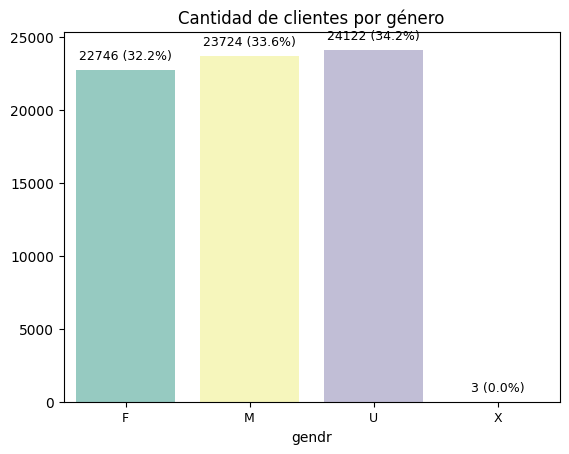

In [17]:
gendr= df_demo['gendr'].value_counts().sort_index()

ax =sns.barplot(x=gendr.index, y=gendr.values, palette="Set3")
plt.title("Cantidad de clientes por género")
plt.xticks(fontsize=9)

# Añadir etiquetas de texto con count y %
total = gendr.sum()
for i, count in enumerate(gendr.values):
    pct = count / total * 100
    ax.text(i, count + total * 0.01, f"{count} ({pct:.1f}%)", ha='center', fontsize=9)

plt.show()

Ver la edad de todos nuestros clientes.

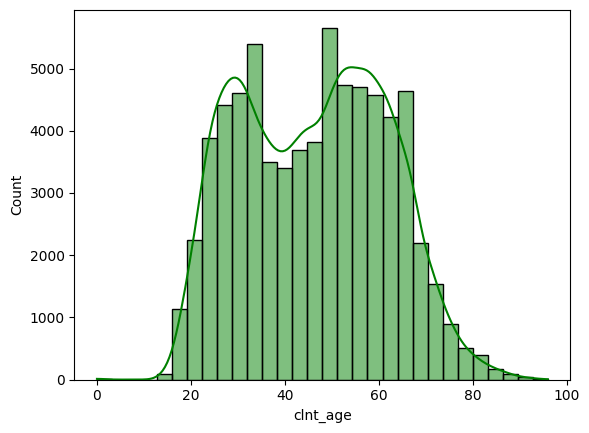

In [18]:
sns.histplot(df_demo['clnt_age'], kde=True, bins=30, color="green")
plt.show()

La antiguedad de todos nuestros clientes

C:\Users\BMENDI\AppData\Local\Temp\ipykernel_11444\3696678643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_años.index, y=conteo_años.values, palette="Set3")


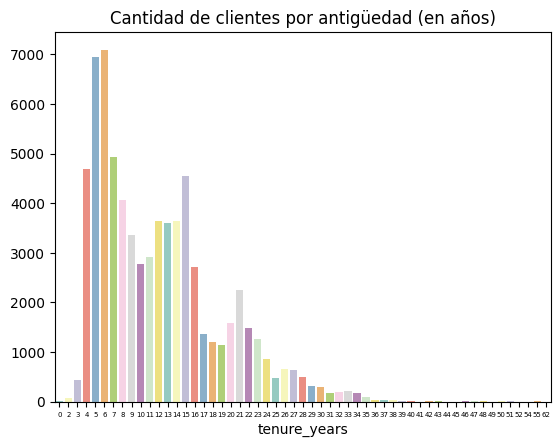

In [19]:
df_demo['tenure_years'] = (df_demo['clnt_tenure_mnth'].fillna(0) // 12).astype(int)
conteo_años = df_demo['tenure_years'].value_counts().sort_index()
sns.barplot(x=conteo_años.index, y=conteo_años.values, palette="Set3")
plt.title("Cantidad de clientes por antigüedad (en años)")
plt.xticks(fontsize=5)
plt.show()

### Analisis del cliente principal

Creación de quintiles por cantidad de bal , así categorizamos los que invierten más y menos con nosotros.

In [20]:
labels = ['Muy baja inversión', 'Baja inversión', 'Media inversión', 'Alta inversión', 'Muy alta inversión']

df_demo['rango_inversion'] = pd.cut(df_demo['bal'], bins=5, labels=labels)

In [21]:
grupos = ['Baja inversión', 'Media inversión', 'Alta inversión', 'Muy alta inversión']
df_top_4_quintiles = df_demo[df_demo['rango_inversion'].isin(grupos)]

In [22]:
conteo_rangos = df_demo['rango_inversion'].value_counts().sort_index()

In [23]:
corte = pd.cut(df_demo['bal'], bins=5)

# Ver los intervalos exactos
print(corte.cat.categories)

IntervalIndex([   (-16320.04, 3264008.03],   (3264008.03, 6528016.06],
                 (6528016.06, 9792024.09],  (9792024.09, 13056032.12],
               (13056032.12, 16320040.15]],
              dtype='interval[float64, right]')


In [24]:
# Muy baja inversión , está la mayoría , y luego los otros 4 quintiles:
#Baja inversión           79
#Media inversión          10
#Alta inversión            1
#Muy alta inversión        1
print(conteo_rangos)


rango_inversion
Muy baja inversión    70518
Baja inversión           79
Media inversión          10
Alta inversión            1
Muy alta inversión        1
Name: count, dtype: int64


C:\Users\BMENDI\AppData\Local\Temp\ipykernel_11444\2692600834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_rangos.index, y=conteo_rangos.values, palette="Set3")


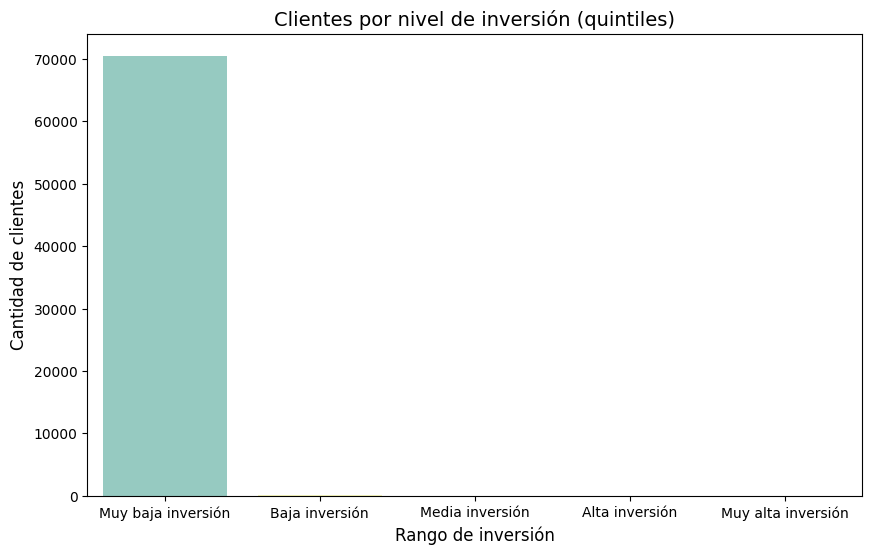

In [25]:
#la cantidad de gente según categoría de bal representado en barplot 

plt.figure(figsize=(10, 6))

sns.barplot(x=conteo_rangos.index, y=conteo_rangos.values, palette="Set3")

plt.title("Clientes por nivel de inversión (quintiles)", fontsize=14)
plt.xlabel("Rango de inversión", fontsize=12)
plt.ylabel("Cantidad de clientes", fontsize=12)

plt.show()

Las veces que entran en la web los  4 quintiles que son los que nos interesan, tienen más dinero pero son menor en número. 

In [26]:
total_logons = df_top_4_quintiles['logons_6_mnth'].sum()
print("Total de logins (últimos 4 quintiles):", total_logons)

Total de logins (últimos 4 quintiles): 691


In [27]:
# la cantidad de gente que entra x veces a la web
logins_por_frecuencia = df_top_4_quintiles['logons_6_mnth'].value_counts().sort_index()
print(logins_por_frecuencia)

logons_6_mnth
2     1
3     2
4     5
5     5
6     5
7    18
8    13
9    42
Name: count, dtype: int64


C:\Users\BMENDI\AppData\Local\Temp\ipykernel_11444\2865889050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=logins_por_frecuencia.index, y=logins_por_frecuencia.values, palette="Set3")


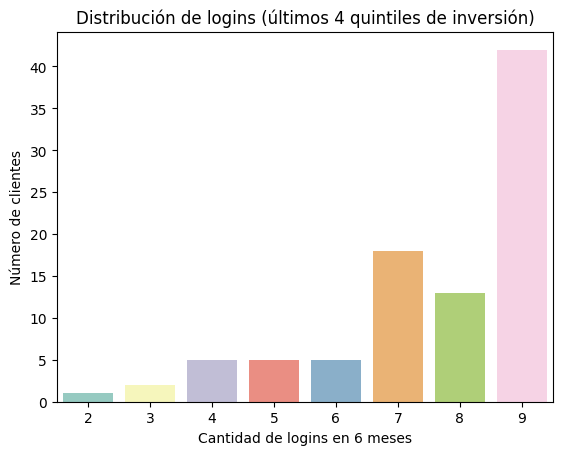

In [28]:
# Distribución de logins (últimos 4 quintiles de inversión)
sns.barplot(x=logins_por_frecuencia.index, y=logins_por_frecuencia.values, palette="Set3")
plt.title("Distribución de logins (últimos 4 quintiles de inversión)")
plt.xlabel("Cantidad de logins en 6 meses")
plt.ylabel("Número de clientes")
plt.show()

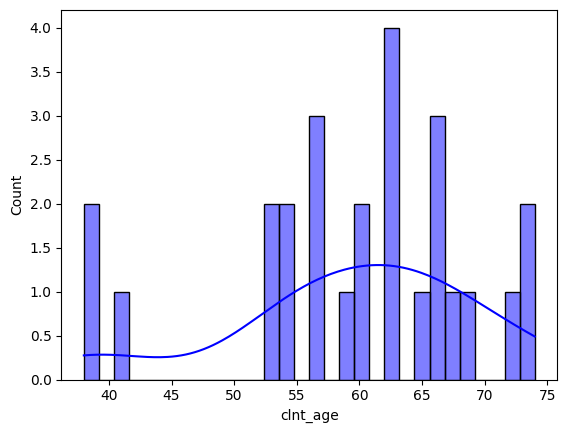

In [29]:
# Filtrar solo los clientes con 9 logons y mas de 4000000 de bal, así son los top clientes de la web 
df_filtrado = df_demo[(df_demo['logons_6_mnth'] == 9) & (df_demo['bal'] > 4_000_000)]

# Histograma de la edad de esos clientes
sns.histplot(df_filtrado['clnt_age'], kde=True, bins=30, color="blue")

plt.show()

In [54]:
df_web.head(80)

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
75,9814849,643702528_85907162029,912594178_11107066778_946103,step_2,2017-04-05 11:22:08,Control
76,9814849,643702528_85907162029,912594178_11107066778_946103,step_1,2017-04-05 11:22:00,Control
77,9814849,643702528_85907162029,912594178_11107066778_946103,start,2017-04-05 11:21:53,Control
78,9814849,643702528_85907162029,912594178_11107066778_946103,start,2017-04-05 11:20:38,Control


# KPIs

### KPI Tasa de finalización

In [30]:
# Unimos los datos web con los datos de experimento
df_web = df_web.merge(df_experiment, on='client_id', how='left')

In [55]:
# Usuarios que llegaron a la página de confirmación
usuarios_confirmacion = df_web[df_web['process_step'] == 'confirm']

In [57]:
# Total de usuarios únicos por grupo
total_por_grupo = df_web.groupby('Variation')['client_id'].nunique()
total_por_grupo

Variation
Control    23532
Test       26968
Name: client_id, dtype: int64

In [59]:
# Usuarios que completaron el proceso por grupo
completaron_por_grupo = usuarios_confirmacion.groupby('Variation')['client_id'].nunique()
completaron_por_grupo

Variation
Control    15434
Test       18687
Name: client_id, dtype: int64

In [61]:
# Tasa de finalización por grupo
tasa_finalizacion = (completaron_por_grupo / total_por_grupo).round(4)
tasa_finalizacion

Variation
Control    0.6559
Test       0.6929
Name: client_id, dtype: float64

##### Vemos que el porcentaje de gente que completa el proceso con el modelo clásico (control) es de 65,59%
##### Vemos que el porcentaje de gente que completa el proceso con el modelo optimizado (test) es de 69,29%
##### Apreciamos que con el cambio, hemos mejorado la tasa de confirmaciones.

## KPI Tiempo dedicado a cada paso

In [64]:
df_web.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation'],
      dtype='object')

In [77]:
df_web['date_time'] = pd.to_datetime(df_web['date_time'].astype(str).str.strip(), errors='coerce')

In [78]:
# Convertimos la columna date_time a tipo datetime
df_web['date_time'] = pd.to_datetime(df_web['date_time'])

In [79]:
# Ordenamos por cliente, visita y tiempo
df_web.sort_values(by=['client_id', 'visit_id', 'date_time'], inplace=True)

In [80]:
# Calculamos la diferencia de tiempo por cliente y visita
df_web['tiempo_diferencia'] = df_web.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

In [87]:
# Creamos pares de pasos para analizar tiempos entre ellos
pares_pasos = [('start', 'step_1'), ('step_1', 'step_2'), ('step_2', 'step_3'), ('step_3', 'confirm')]

In [88]:
# Diccionario para guardar resultados
tiempos_promedios = {}

for paso_origen, paso_destino in pares_pasos:
    # filtramos movimientos donde origen -> destino
    mask_origen = df_web['process_step'] == paso_origen
    mask_destino = df_web['process_step'] == paso_destino

    # extraemos el tiempo entre pasos
    transiciones = df_web[mask_destino].copy()
    transiciones['prev_step'] = df_web[mask_destino].groupby(['client_id', 'visit_id'])['process_step'].shift(1)
    
    # filtramos solo si el paso anterior fue el esperado
    transiciones = transiciones[df_web['process_step'].shift(1) == paso_origen]
    
    # agrupamos por grupo de experimento
    tiempos_promedios[f"{paso_origen} → {paso_destino}"] = transiciones.groupby('Variation')['tiempo_diferencia'].mean().round(2)

# 6. Mostramos los resultados
for k, v in tiempos_promedios.items():
    print(f"Tiempo promedio de {k} (en segundos):")
    print(v)

C:\Users\BMENDI\AppData\Local\Temp\ipykernel_11444\2619397816.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transiciones = transiciones[df_web['process_step'].shift(1) == paso_origen]
C:\Users\BMENDI\AppData\Local\Temp\ipykernel_11444\2619397816.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transiciones = transiciones[df_web['process_step'].shift(1) == paso_origen]
C:\Users\BMENDI\AppData\Local\Temp\ipykernel_11444\2619397816.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transiciones = transiciones[df_web['process_step'].shift(1) == paso_origen]


Tiempo promedio de start → step_1 (en segundos):
Variation
Control    37.64
Test       31.07
Name: tiempo_diferencia, dtype: float64
Tiempo promedio de step_1 → step_2 (en segundos):
Variation
Control    33.82
Test       37.10
Name: tiempo_diferencia, dtype: float64
Tiempo promedio de step_2 → step_3 (en segundos):
Variation
Control    87.01
Test       86.47
Name: tiempo_diferencia, dtype: float64
Tiempo promedio de step_3 → confirm (en segundos):
Variation
Control    127.15
Test       104.83
Name: tiempo_diferencia, dtype: float64


C:\Users\BMENDI\AppData\Local\Temp\ipykernel_11444\2619397816.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transiciones = transiciones[df_web['process_step'].shift(1) == paso_origen]
